In [1]:
import pandas as pd
import re
import ast

from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import font_manager
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 1: Load the data 載入資料</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Dataset Information 資料集資訊</div>

# PTT AI 討論資料集介紹

## 資料集概覽

此資料集包含有關 AI 的討論，收集自台灣的社群媒體平台 PTT。資料收集範圍從 2022 年 1 月 1 日到 2024 年 5 月 31 日，共包含 2,172 筆資料。

## 資料欄位說明

資料集包含以下 11 個欄位：

1. `system_id`: 系統編號，總共 2172 筆，無空值。
2. `artComment`: 文章評論，總共 2172 筆，無空值。
3. `artDate`: 文章日期，總共 2172 筆，無空值。
4. `insertedDate`: 插入日期，總共 2172 筆，無空值。
5. `artContent`: 文章內容，總共 2172 筆，無空值。
6. `artCatagory`: 文章類別，總共 2172 筆，無空值。
7. `dataSource`: 資料來源，總共 2172 筆，無空值，全部來自 PTT。
8. `artPoster`: 發文者，總共 2172 筆，無空值。
9. `artTitle`: 文章標題，總共 2172 筆，無空值。
10. `artUrl`: 文章網址，總共 2172 筆，無空值。

## 記憶體使用情況

- 資料集大小： 186.8+ KB
- 資料型態：整數 (int64) 1 欄，物件 (object) 9 欄

In [2]:
df = pd.read_csv('data/Merged.csv')
df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1714553434.A...,Re:[面試]104待遇寫4w~4.8w你應該開多少？,2024-05-01 16:50:30,LaAc,Tech_Job,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。\n\n前陣子業界很凍（現在好像...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""kwanles"", ""c...",27.53.241.196,2024-05-02 02:19:38,ptt
1,2,https://www.ptt.cc/bbs/Tech_Job/M.1714555446.A...,[新聞]年後轉職最熱門公司出爐前三名台積電、,2024-05-01 17:24:04,qazxc1156892,Tech_Job,新聞標題： 年後轉職最熱門公司出爐 前三名台積電、華碩、台達電\n\n2024-05-01 ...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""abc21086999""...",223.137.1.131,2024-05-02 02:19:38,ptt
2,3,https://www.ptt.cc/bbs/Tech_Job/M.1714556891.A...,[新聞]訓練台版AI語言模型，許永真：盼讓百工,2024-05-01 17:48:08,pl132,Tech_Job,訓練台版 AI 語言模型，許永真：盼讓百工百業商用\nhttps://technews.tw...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ling621"", ""c...",180.177.2.112,2024-05-02 02:19:38,ptt
3,4,https://www.ptt.cc/bbs/Tech_Job/M.1714570922.A...,[新聞]首屆台法科研會議吳政忠：六大領域可望,2024-05-01 21:41:58,createlight,Tech_Job,https://www.epochtimes.com/b5/24/4/30/n1423755...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""unima"", ""cmt...",114.39.34.219,2024-05-02 02:19:38,ptt
4,5,https://www.ptt.cc/bbs/Tech_Job/M.1714571028.A...,[心得]電子業PM面試紀錄（長文）,2024-05-01 21:43:46,tin8420,Tech_Job,https://reurl.cc/ezOm9x\n網誌版\n\n商科學士29y，傳產PM+生...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""KMTlikesshit...",118.231.160.114,2024-05-02 02:19:38,ptt


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system_id     2457 non-null   object
 1   artUrl        2457 non-null   object
 2   artTitle      2457 non-null   object
 3   artDate       2457 non-null   object
 4   artPoster     2457 non-null   object
 5   artCatagory   2457 non-null   object
 6   artContent    2457 non-null   object
 7   artComment    2457 non-null   object
 8   e_ip          2440 non-null   object
 9   insertedDate  2457 non-null   object
 10  dataSource    2457 non-null   object
dtypes: object(11)
memory usage: 211.3+ KB


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the font 載入字型</div>

In [4]:
# Path to the custom font
font_path = 'font/TaipeiSansTCBeta-Regular.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Taipei Sans TC Beta


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 2: Data Preprocessing 資料前處理</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Data Cleaning 資料清理</div>

In [5]:
# 複製原始資料集
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artUrl', 'artPoster', 'artCatagory', 'artComment', 'insertedDate', 'dataSource', 'e_ip']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artTitle,artDate,artContent,sentence
0,Re:[面試]104待遇寫4w~4.8w你應該開多少？,2024-05-01 16:50:30,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。\n\n前陣子業界很凍（現在好像...,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。。前陣子業界很凍（現在好像也.....
1,[新聞]年後轉職最熱門公司出爐前三名台積電、,2024-05-01 17:24:04,新聞標題： 年後轉職最熱門公司出爐 前三名台積電、華碩、台達電\n\n2024-05-01 ...,新聞標題： 年後轉職最熱門公司出爐 前三名台積電、華碩、台達電。2024-05-01 11:...
2,[新聞]訓練台版AI語言模型，許永真：盼讓百工,2024-05-01 17:48:08,訓練台版 AI 語言模型，許永真：盼讓百工百業商用\nhttps://technews.tw...,訓練台版 AI 語言模型，許永真：盼讓百工百業商用， 4 月啟動 TAIDE 計畫，研發台版...
3,[新聞]首屆台法科研會議吳政忠：六大領域可望,2024-05-01 21:41:58,https://www.epochtimes.com/b5/24/4/30/n1423755...,吳政忠：六大領域可望締造雙贏， Giry）。（國，科會提供）。【大紀元2024年04月30...
4,[心得]電子業PM面試紀錄（長文）,2024-05-01 21:43:46,https://reurl.cc/ezOm9x\n網誌版\n\n商科學士29y，傳產PM+生...,威剛 — Sales PM，面試地點在中和，結果搞小烏龍跑錯棟+樓層，有稍微遲到一下下，感...
5,[新聞]美晶片陷缺工危機須靠外籍人才填補,2024-05-01 21:44:23,https://ec.ltn.com.tw/article/breakingnews/465...,須靠外籍人才填補。2024/05/01 15:57， Long）、「商業市場」（Marke...
6,[新聞]那「一通電話」白打了？台積電恐放棄在,2024-05-02 08:06:20,那「一通電話」白打了？台積電恐放棄在銅鑼建先進封裝廠\n\n〔記者洪友芳／新竹報導〕\n晶圓...,那「一通電話」白打了？台積電恐放棄在銅鑼建先進封裝廠。〔記者洪友芳／新竹報導〕，晶圓代工廠力...
7,科企裁員潮｜Google裁減至少200名「核心」團隊,2024-05-02 11:47:00,https://inews.hket.com/article/3753047\n科企裁員潮｜...,部分職位轉移到印度和墨西哥。，Google母企Alphabet（美：GOOG）據報上星期公...
8,[新聞]今年要繳稅335萬…眾人秒跪！10年工程師,2024-05-02 12:43:42,今年要繳稅335萬…眾人秒跪！10年工程師：感謝「海產店」照顧\nhttps://finan...,今年要繳稅335萬…眾人秒跪！10年工程師：感謝「海產店」照顧， 該哭該笑？，」「我繳3萬多...
9,[新聞]外媒：台積電作為世界領導者股價實在太,2024-05-02 14:03:51,外媒：台積電作為世界領導者 股價實在太便宜\n\n高佳菁／核稿編輯\n\n〔財經頻道／綜合報...,外媒：台積電作為世界領導者 股價實在太便宜。高佳菁／核稿編輯。〔財經頻道／綜合報導〕《電訊報...


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Sentence 斷句</div>

In [6]:
# 去除一些不需要的欄位
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")
meta_data = clear_df.explode('sentence').reset_index(drop=True)

meta_data['sentence'] = meta_data['sentence'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))

meta_data.head()

,artTitle,artDate,artContent,sentence
0,Re:[面試]104待遇寫4w~4.8w你應該開多少？,2024-05-01 16:50:30,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。\n\n前陣子業界很凍（現在好像...,很明顯絕對會
1,Re:[面試]104待遇寫4w~4.8w你應該開多少？,2024-05-01 16:50:30,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。\n\n前陣子業界很凍（現在好像...,我之前面試時就遇過
2,Re:[面試]104待遇寫4w~4.8w你應該開多少？,2024-05-01 16:50:30,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。\n\n前陣子業界很凍（現在好像...,而且明擺著開太高不會用你
3,Re:[面試]104待遇寫4w~4.8w你應該開多少？,2024-05-01 16:50:30,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。\n\n前陣子業界很凍（現在好像...,前陣子業界很凍現在好像也
4,Re:[面試]104待遇寫4w~4.8w你應該開多少？,2024-05-01 16:50:30,很明顯絕對會，我之前面試時就遇過，而且明擺著開太高不會用你。\n\n前陣子業界很凍（現在好像...,我又剛好快畢業了


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Setup NER Model 設定 NER 模型</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the NER Model 載入 NER 模型</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Initialize the CKIP NLP Tool 初始化 CKIP NLP 工具</div>

In [7]:
# 初始化 ckip 工具
ws_driver  = CkipWordSegmenter(model_name="ckiplab/bert-base-chinese-ws", device=0)
pos_driver = CkipPosTagger(model_name="ckiplab/bert-base-chinese-pos", device=0)
ner_driver = CkipNerChunker(model_name="ckiplab/bert-base-chinese-ner", device=0)

2025-06-09 12:31:41.135048: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-09 12:31:43.038460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-09 12:31:43.038576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-09 12:31:43.236120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 12:31:43.791597: I tensorflow/core/platform/cpu_feature_guar

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">NER Prediction NER 預測</div>

In [8]:
text = meta_data['sentence'].tolist()

# 執行
ws = ws_driver(text)
pos = pos_driver(ws)
ner = ner_driver(text)

Inference: 100%|██████████| 494/494 [00:54<00:00,  9.03it/s]


In [9]:
# 將斷詞以及 pos 結果合在一起顯示
def pack_ws_pos_sentence(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = []
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
      res.append(f"{word_ws}({word_pos})")
   return "\u3000".join(res)

sentences, packed_sentences, entities = [], [], []
# 儲存結果
for sentence, sentence_ws, sentence_pos, sentence_ner in zip(text, ws, pos, ner):
   sentences.append(sentence)
   packed_sentences.append(pack_ws_pos_sentence(sentence_ws, sentence_pos))
   entities.append([str(entity) for entity in sentence_ner])

# 將結果存在一個 dataframe 中
ner_results = pd.DataFrame({
   'sentence': sentences,
   'packed_sentence': packed_sentences,
   'entities': entities
})

ner_results.head()

,sentence,packed_sentence,entities
0,很明顯絕對會,很(Dfa) 明顯(VH) 絕對(D) 會(D),[]
1,我之前面試時就遇過,我(Nh) 之前(Ng) 面試(VC) 時(Ng) 就(D) 遇(VK) 過(Di),[]
2,而且明擺著開太高不會用你,而且(Cbb) 明(VH) 擺(VC) 著(Di) 開(VC) 太(Dfa) 高(VH) 不...,[]
3,前陣子業界很凍現在好像也,前(Nes) 陣子(Nd) 業界(Nc) 很(Dfa) 凍(VH) 現在(Nd) 好像(D)...,[]
4,我又剛好快畢業了,我(Nh) 又(D) 剛好(Da) 快(D) 畢業(VH) 了(T),[]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Remove the empty sentence 移除空句子</div>

In [10]:
ner_results = ner_results[ner_results['sentence'] != '']
ner_results.head()

,sentence,packed_sentence,entities
0,很明顯絕對會,很(Dfa) 明顯(VH) 絕對(D) 會(D),[]
1,我之前面試時就遇過,我(Nh) 之前(Ng) 面試(VC) 時(Ng) 就(D) 遇(VK) 過(Di),[]
2,而且明擺著開太高不會用你,而且(Cbb) 明(VH) 擺(VC) 著(Di) 開(VC) 太(Dfa) 高(VH) 不...,[]
3,前陣子業界很凍現在好像也,前(Nes) 陣子(Nd) 業界(Nc) 很(Dfa) 凍(VH) 現在(Nd) 好像(D)...,[]
4,我又剛好快畢業了,我(Nh) 又(D) 剛好(Da) 快(D) 畢業(VH) 了(T),[]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Save the NER Results 儲存 NER 結果</div>

In [11]:
ner_results.to_csv('data/ner_results.csv', index=False)

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Parse NER and POS Results 解析 NER 和 POS 結果</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the NER Results 載入 NER 結果</div>

In [12]:
ner_results = pd.read_csv('data/ner_results.csv')
ner_results.head()

,sentence,packed_sentence,entities
0,很明顯絕對會,很(Dfa) 明顯(VH) 絕對(D) 會(D),[]
1,我之前面試時就遇過,我(Nh) 之前(Ng) 面試(VC) 時(Ng) 就(D) 遇(VK) 過(Di),[]
2,而且明擺著開太高不會用你,而且(Cbb) 明(VH) 擺(VC) 著(Di) 開(VC) 太(Dfa) 高(VH) 不...,[]
3,前陣子業界很凍現在好像也,前(Nes) 陣子(Nd) 業界(Nc) 很(Dfa) 凍(VH) 現在(Nd) 好像(D)...,[]
4,我又剛好快畢業了,我(Nh) 又(D) 剛好(Da) 快(D) 畢業(VH) 了(T),[]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Parse the packed_sentence 解析 packed_sentence</div>

In [13]:
tqdm.pandas()

# Define a function to split the packed_sentence into word and pos
def split_packed_sentence(packed_sentence):
    words, pos_tags = [], []
    for token in packed_sentence.split('　'):
        word, pos = token.rsplit('(', 1)
        pos = pos.rstrip(')')
        words.append(word)
        pos_tags.append(pos)
    return words, pos_tags

# Apply the function to split the packed_sentence
ner_results[['words', 'pos_tags']] = ner_results['packed_sentence'].progress_apply(lambda x: pd.Series(split_packed_sentence(x)))

# Explode the lists to create a row for each word-pos pair
exploded_data = ner_results[['sentence', 'words', 'pos_tags']].explode(['words', 'pos_tags'])

# Rename columns for clarity
exploded_data = exploded_data.rename(columns={'words': 'word', 'pos_tags': 'pos'})

100%|██████████| 126437/126437 [00:04<00:00, 25395.51it/s]


In [14]:
exploded_data.head()

,sentence,word,pos
0,很明顯絕對會,很,Dfa
0,很明顯絕對會,明顯,VH
0,很明顯絕對會,絕對,D
0,很明顯絕對會,會,D
1,我之前面試時就遇過,我,Nh


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Parse the entities 解析 entities</div>

In [15]:
# Function to extract words and their NER tags from the given example
def extract_words_and_ner(row):
    sentence = row['sentence']
    packed_sentence = row['packed_sentence']
    entities_str = row['entities']
    
    words = [token.rsplit('(', 1)[0] for token in packed_sentence.split('　')]
    entity_tuples = []
    
    if entities_str and entities_str != "[]":
        try:
            entity_list = ast.literal_eval(entities_str)
            for entity in entity_list:
                # Manually parse the entity string
                start_idx = entity.find("word='") + len("word='")
                end_idx = entity.find("', ner='")
                word = entity[start_idx:end_idx]
                
                start_ner_idx = entity.find("ner='") + len("ner='")
                end_ner_idx = entity.find("', idx=")
                ner = entity[start_ner_idx:end_ner_idx]
                
                entity_tuples.append((sentence, word, ner))
        except (ValueError, SyntaxError):
            pass
    
    return entity_tuples

# Apply the function to extract words and NER tags for each row
extracted_data = []
for _, row in tqdm(ner_results.iterrows(), total=len(ner_results)):
    extracted_data.extend(extract_words_and_ner(row))

# Create a new DataFrame with the extracted data
ner_extracted_df = pd.DataFrame(extracted_data, columns=['sentence', 'word', 'ner'])

100%|██████████| 126437/126437 [00:02<00:00, 46625.52it/s]


In [16]:
ner_extracted_df.head()

,sentence,word,ner
0,還有一個小小的考核,一,CARDINAL
1,如果開太高就不會有二面了這是原話,二面,CARDINAL
2,雖然知道講萬一定最好,萬,CARDINAL
3,所以講了個萬的範圍,萬,CARDINAL
4,新聞標題年後轉職最熱門公司出爐前三名台積電華碩台達電,年後,DATE


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 4: Data Analysis 資料分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">NER Categories NER 類別</div>

In [17]:
ner_count = pd.DataFrame(ner_extracted_df['ner'].value_counts())
ner_count.reset_index(inplace=True)

ner_count.columns = ['ner', 'count']
ner_count

,ner,count
0,ORG,11339
1,GPE,8633
2,DATE,7499
3,PERSON,7101
4,CARDINAL,5003
5,MONEY,1579
6,LAW,1313
7,TIME,1228
8,ORDINAL,1034
9,LOC,973


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Plot the NER Categories 繪製 NER 類別</div>

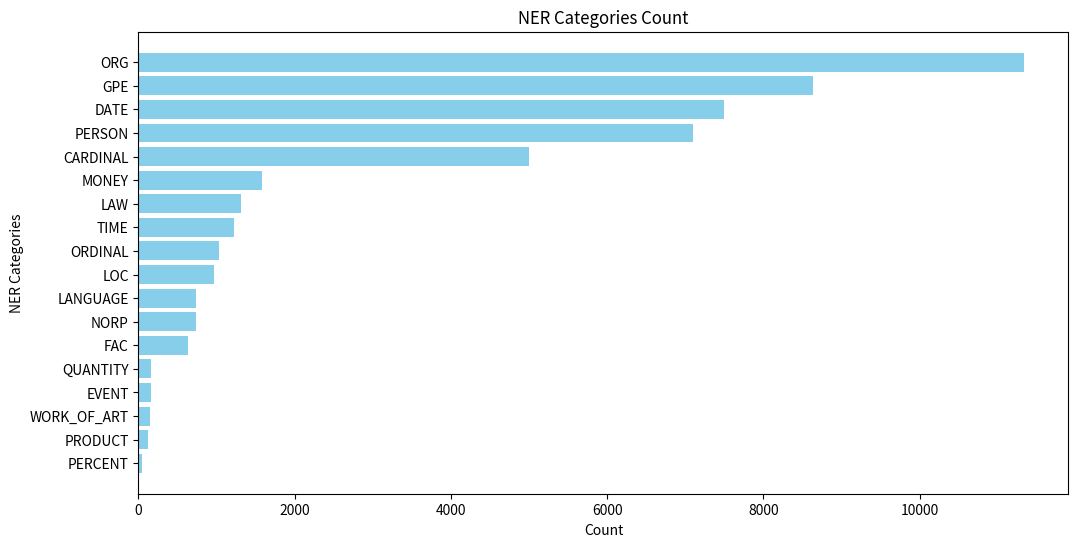

In [18]:
# 繪製 NER 類別
plt.figure(figsize=(12, 6))
plt.barh(ner_count['ner'], ner_count['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('NER Categories')
plt.title('NER Categories Count')
plt.gca().invert_yaxis()
plt.show()

### NER 類別計數分析

1. 主要類別：
    - ORG（組織）：最常被提及的實體，表明討論中涉及大量關於公司、機構或其他與AI相關的組織。
    - GPE（地理政治實體）：頻繁提及，反映出討論涉及國家、城市或地區，這些地方與AI的發展息息相關。
    - DATE（日期）：經常提及特定日期，這表明討論內容可能涉及AI相關的事件、發佈或時間表。
    - PERSON（人物）：多次提及個人，表明討論涉及AI領域的重要人物，如研究人員、CEO或有影響力的發言人。

2. 中等頻率：
    - CARDINAL（基數）：討論中使用的數字，反映出AI討論中涉及大量的統計、測量或計數內容。
    - MONEY（金額）：提及財務數字，表示討論中涉及AI項目的資金、投資或成本。
    - ORDINAL（序數）：顯示排名或排序的重要性，反映出AI討論中的序列或順序。

3. 較少提及的類別：
    - NORP（民族、宗教或政治團體）：涉及特定群體或社群，與AI討論相關。
    - LOC（地點）：未在GPE中涵蓋的特定地點，顯示與AI相關活動的地點。
    - TIME（時間）：特定時間，反映AI相關活動或事件的時間。

4. 少量提及的類別：
    - LANGUAGE（語言）、EVENT（事件）、QUANTITY（數量）、WORK_OF_ART（藝術品）、FAC（設施）、PRODUCT（產品）、LAW（法律）、PERCENT（百分比）：這些類別提及次數較少，但在AI討論中仍具有特定的相關性，例如AI系統使用的語言、特定事件、數量及法律或藝術方面的內容。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Organize the NER Results 組織 NER 結果</div>

In [19]:
# 篩選 NER 為 'ORG' 的資料
filter_ner = ['ORG']
org_data = ner_extracted_df[ner_extracted_df['ner'].isin(filter_ner)]
org_data.head()

,sentence,word,ner
6,新聞標題年後轉職最熱門公司出爐前三名台積電華碩台達電,台積電,ORG
7,經濟日報記者葉卉軒台北即時報導,經濟日報,ORG
11,比薪水年後薪水情報兌換最多的前三名公司為台積電華碩台達,台積電華碩台達,ORG
12,其中華碩的兌換次數為,華碩,ORG
15,近年積極擴廠全世界都在看的半導體龍頭台積電,台積電,ORG


findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-

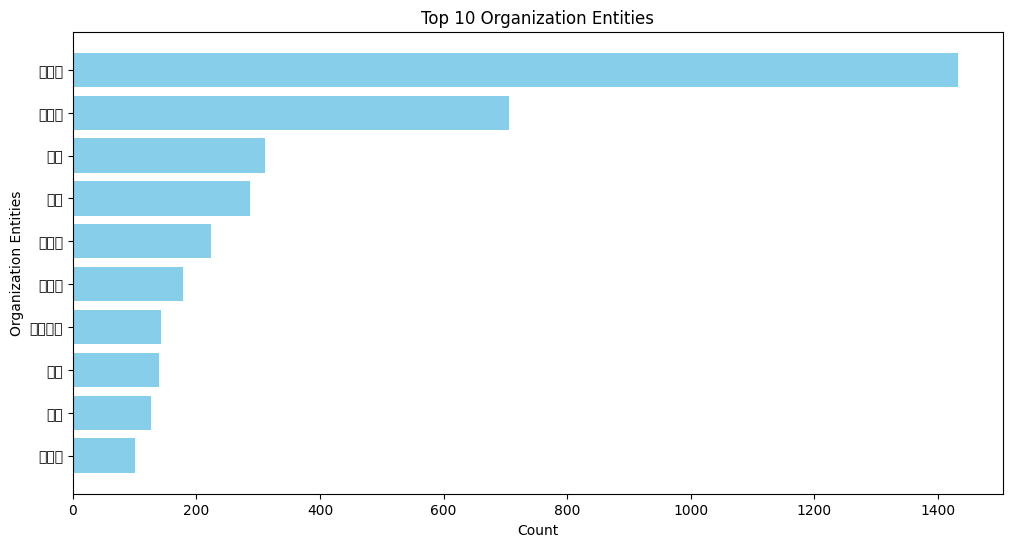

In [20]:
# 視覺化組織實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(org_data['word'].value_counts().index[:10], org_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Organization Entities')
plt.title('Top 10 Organization Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名組織實體

1. 台積電：
    - 分析：台積電是全球最大的半導體製造公司之一，在AI硬體領域中扮演著關鍵角色。它的高頻提及顯示出在AI討論中，與半導體技術的相關性和重要性。
    - 影響：台積電的技術創新和製造能力對AI芯片的發展至關重要，討論可能涉及其技術突破、新產品發佈或市場動向。

2. 微軟：
    - 分析：微軟是全球領先的科技公司之一，其在AI軟體和雲端服務領域的投入和創新廣為人知。它的頻繁出現顯示出其在AI領域的顯著影響力。
    - 影響：討論可能涵蓋微軟的AI平台、工具、研究計劃及與其他企業的合作。

3. 英特爾：
    - 分析：作為主要的半導體公司之一，英特爾在AI硬體領域中也占有重要地位。它的提及反映了其在推動AI計算能力方面的貢獻。
    - 影響：討論可能涉及英特爾的新技術、處理器產品或在AI領域的戰略部署。

4. 輝達（NVIDIA）：
    - 分析：輝達以其GPU技術聞名，對AI和深度學習的發展起到了至關重要的作用。其頻繁被提及表明其技術在AI應用中的核心地位。
    - 影響：討論可能涉及其GPU技術、AI開發平台（如CUDA）及其在各種AI應用中的使用。

5. 聯發科：
    - 分析：聯發科是知名的晶片製造商，其產品廣泛應用於各種消費電子設備。其在AI討論中的出現表明其技術在相關應用中的重要性。
    - 影響：討論可能涵蓋聯發科的AI晶片、技術創新及其市場競爭力。

6. 鴻海：
    - 分析：鴻海科技集團是全球最大的電子製造服務提供商，與AI相關的製造和技術研發也受到關注。
    - 影響：討論可能涉及其在AI硬體製造、工業自動化及相關合作上的貢獻。

7. 谷歌：
    - 分析：谷歌是全球領先的科技公司之一，在AI研究和應用上都處於領先地位。其被提及次數雖未進前十，但其重要性不容忽視。
    - 影響*：討論可能涵蓋谷歌的AI研究、技術應用及其在推動AI發展上的重要舉措。

8. 蘋果：
    - 分析：蘋果公司以其創新產品和技術著稱，在AI應用（如Siri、Face ID等）方面也有顯著貢獻。
    - 影響：討論可能集中在蘋果的AI技術整合及其對消費者市場的影響。

9. 特斯拉：
    - 分析：特斯拉在自動駕駛和電動車領域的技術創新引人注目，這在AI討論中也是一個重要話題。
    - 影響：討論可能涉及特斯拉的自動駕駛技術、AI芯片及其在汽車行業中的領導地位。

10. 經濟日報：
    - 分析：經濟日報作為一家主要的財經媒體，其報導內容可能對AI領域的資訊傳播和輿論影響起到重要作用。
    - 影響：討論可能包括該媒體對AI技術、企業動向及市場趨勢的報導。

### 缺失的英文組織

在此圖表中，部分重要的英文名稱組織如OpenAI和Google等未能列出，可能是因為CKIP Transformer模型對中文識別效果較好，但對英文名稱識別存在不足。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">PERSON Entities 人物實體</div>

In [21]:
# 篩選 NER 為 'PERSON' 的資料
filter_ner = ['PERSON']
person_data = ner_extracted_df[ner_extracted_df['ner'].isin(filter_ner)]
person_data.head()

,sentence,word,ner
8,經濟日報記者葉卉軒台北即時報導,葉卉軒,PERSON
36,比薪水表示,比薪水,PERSON
39,許永真盼讓百工百業商用,許永真,PERSON
43,永真表示,永真,PERSON
51,台大資工系教授許永真以台灣的與大型語言,許永真,PERSON


findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 40643 (\N{CJK UNIFIED IDEOGRAPH-9EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20161 (\N{CJK UNIFIED IDEOGRAPH-4EC1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21235 (\N{CJK UNIFIED IDEOGRAPH-52F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-

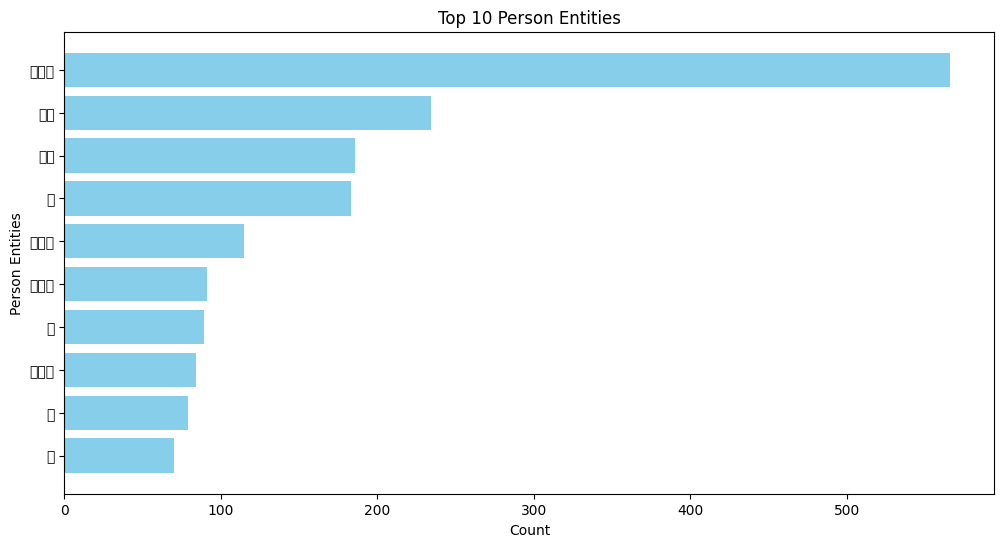

In [22]:
# 視覺化人物實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(person_data['word'].value_counts().index[:10], person_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Person Entities')
plt.title('Top 10 Person Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名人物實體

1. 黃仁勳：
    - 分析：黃仁勳是 NVIDIA 的創辦人兼 CEO，他在 AI 領域中扮演著至關重要的角色。NVIDIA 的 GPU 技術對 AI 和深度學習的發展起到了巨大推動作用。
    - 影響：討論可能涉及他在 AI 領域的技術貢獻、公司戰略及未來規劃。

2. 輝達（NVIDIA）：
    - 分析：輝達是全球領先的 GPU 製造商，其技術對於深度學習和 AI 的計算能力至關重要。這顯示出在 AI 討論中，輝達的技術和產品受到高度關注。
    - 影響：討論可能涉及輝達的 GPU 技術、AI 平台（如 CUDA）、技術創新以及市場競爭力。
    - 備註：輝達被誤認為是人物實體，實際上是組織實體。

3. 馬斯克：
    - 分析：埃隆·馬斯克（Elon Musk）是多家科技公司的創辦人，包括特斯拉和 SpaceX。他在 AI 領域尤其是自動駕駛技術方面有著重要影響。
    - 影響：討論可能集中在他對 AI 發展的看法、技術創新以及在相關公司的動向。

4. 亞馬遜：
    - 分析：亞馬遜在 AI 技術應用、雲端服務和智能助理（如 Alexa）方面有著重要的地位，顯示出其在 AI 討論中的重要性。
    - 影響：討論可能涉及亞馬遜的 AI 技術應用、AWS 服務及市場策略。
    - 備註：亞馬遜被誤認為是人物實體，實際上是組織實體。

5. 薩提亞·納德拉：
    - 分析：薩提亞·納德拉（Satya Nadella）是微軟的現任 CEO，在他的領導下，微軟在 AI 領域取得了顯著的進展。
    - 影響：討論可能涉及微軟的 AI 技術、產品發佈及市場策略。

6. 劉揚偉：
    - 分析：劉揚偉是鴻海科技集團（富士康）的董事長，他在 AI 技術和製造業自動化方面有重要影響。
    - 影響：討論可能涉及鴻海在 AI 領域的投資、技術應用及未來發展。

7. 特斯拉：
    - 分析：特斯拉在自動駕駛和電動車領域的創新使其在 AI 討論中頻繁出現。
    - 影響：討論可能涉及特斯拉的自動駕駛技術、AI 芯片及其在汽車行業中的領導地位。
    - 備註：特斯拉被誤認為是人物實體，實際上是組織實體。 

8. 林百里：
    - 分析：林百里是廣達電腦的創辦人及董事長，廣達在 AI 硬體和伺服器市場有重要地位。
    - 影響：討論可能涉及廣達的 AI 產品、技術創新及市場表現。

9. 奧特曼：
    - 分析：奧特曼可能是指 Sam Altman，他是 OpenAI 的 CEO，對 AI 技術和倫理有深刻見解。
    - 影響：討論可能涉及 OpenAI 的技術突破、研究方向及 AI 倫理問題。

10. 巴菲特：
    - 分析：沃倫·巴菲特（Warren Buffett）是著名的投資者，他的意見在科技和 AI 投資方面具有影響力。
    - 影響：討論可能涉及巴菲特對 AI 公司的投資和市場預測。

#### 組織被誤判為人物
在分析過程中，我們發現輝達（NVIDIA）、亞馬遜（Amazon）和特斯拉（Tesla）這些組織實體被誤判為人物實體。這反映 CKIP Transformer 模型在識別專有名詞時可能存在一定的誤差，需要進一步改進。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Event Entities 事件實體</div>

In [23]:
# 篩選 NER 為 'EVENT' 的資料
filter_ner = ['EVENT']
event_data = ner_extracted_df[ner_extracted_df['ner'].isin(filter_ner)]
event_data.head()

,sentence,word,ner
877,年度股東大會上談及人工智慧時表示,年度股東大會,EVENT
1356,大馬亞洲防務展台灣軍工業力拚國際市場,大馬亞洲防務展,EVENT
1361,中央社記者黃自強吉隆坡日專電年亞洲防務展和亞洲國家安全展,亞洲防務展,EVENT
1362,中央社記者黃自強吉隆坡日專電年亞洲防務展和亞洲國家安全展,亞洲國家安全展,EVENT
1369,第屆亞洲防務展從日起到日在馬來西亞國際貿易與展覽中心舉行,第屆亞洲防務展,EVENT


findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/

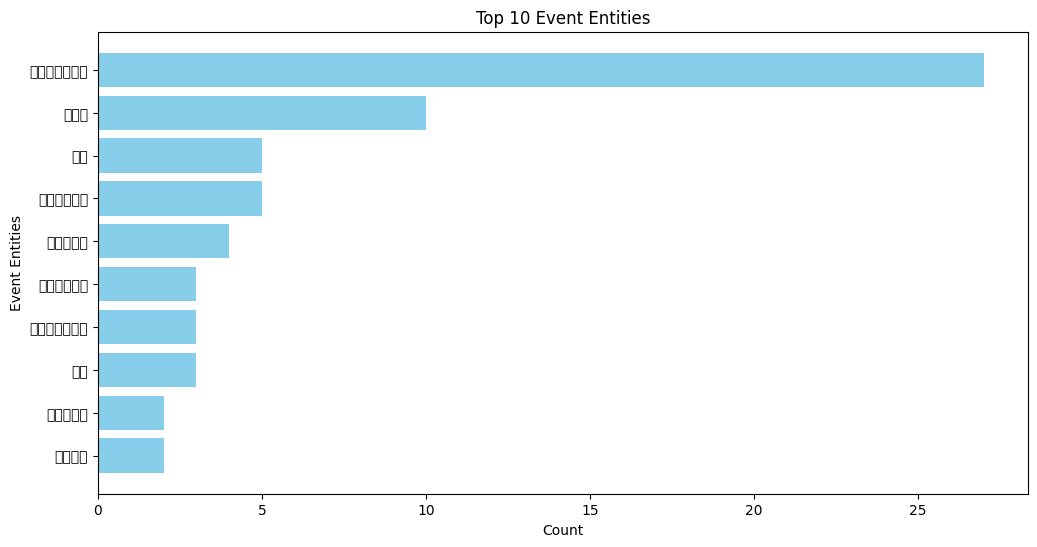

In [24]:
# 視覺化事件實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(event_data['word'].value_counts().index[:10], event_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Event Entities')
plt.title('Top 10 Event Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名事件實體

1. 台北國際電腦展：
    - 分析：台北國際電腦展（COMPUTEX TAIPEI）是全球領先的電腦和科技展覽會，每年吸引眾多科技公司和專業人士參與。它是展示最新科技和創新產品的重要平台。
    - 影響：討論可能涉及展覽會上展示的最新 AI 技術和產品，以及各大公司的參展情況和技術展示，反映出 AI 行業的最新動態和趨勢。

2. 俄烏戰爭：
    - 分析：俄烏戰爭是一個全球性重大事件，對各行各業，包括科技和 AI 領域，都產生了深遠影響。戰爭引發的地緣政治緊張和經濟制裁，對科技供應鏈和技術合作產生了影響。
    - 影響：討論可能涉及戰爭對 AI 技術研發和應用的影響，例如供應鏈中斷、技術封鎖和全球科技合作的變化。

3. 新冠肺炎：
    - 分析：新冠肺炎疫情是近年來最大的全球健康危機，對各行各業都產生了深遠影響。AI 技術在疫情防控、疫苗研發和醫療服務中的應用備受關注。
    - 影響：討論可能集中在 AI 如何幫助應對疫情，包括疫情預測、患者跟踪、醫療診斷和疫苗研發等方面的應用。

4. 博弈會：
    - 分析：博弈會可能指的是相關行業的展覽會或研討會，這些活動通常聚焦於遊戲和賭博行業中的最新技術和趨勢。
    - 影響：討論可能涉及 AI 在遊戲開發、自動化賭博系統以及虛擬現實等領域的應用。

5. 輝達大會：
    - 分析：輝達大會（NVIDIA GTC）是 NVIDIA 主辦的技術大會，專注於 GPU 技術和 AI 的最新進展。這是展示 AI 研究成果和應用的重要平台。
    - 影響：討論可能集中在輝達在大會上發佈的新技術、新產品以及 AI 研究的新方向，反映出業界對 GPU 技術和 AI 應用的重視。

6. 世界經濟論壇：
    - 分析：世界經濟論壇（WEF）是全球領先的經濟會議，討論全球經濟和科技的未來走向。AI 技術是其中的重要話題之一。
    - 影響：討論可能涉及論壇中對 AI 技術的討論，特別是 AI 對全球經濟、就業和倫理問題的影響。

7. 烏克蘭戰爭：
    - 分析：與俄烏戰爭重複，這再次表明該事件的重要性和影響力。
    - 影響：同上，討論可能涉及戰爭對 AI 技術研發和應用的影響。

8. 台灣人工智慧年會：
    - 分析：台灣人工智慧年會是本地重要的 AI 行業會議，專注於 AI 技術的發展和應用。
    - 影響：討論可能涉及會議中的技術分享、研究成果展示以及行業趨勢的討論。

9. 國際半導體展：
    - 分析：國際半導體展（Semicon）是全球主要的半導體行業展覽會，展示最新的半導體技術和產品。
    - 影響：討論可能涉及展覽會上的技術創新、產品展示以及半導體技術對 AI 發展的推動作用。

10. 財報電話會議：
    - 分析：財報電話會議是企業發布財務業績和展望的重要渠道。這些會議通常涉及公司對 AI 技術投資和應用的討論。
    - 影響：討論可能涉及企業在財報中對 AI 項目的投資、技術進展以及未來的發展規劃。

#### 重複事件名稱

雖然有些事件如「烏克蘭戰爭」和「俄烏戰爭」在本質上是同一事件，但由於命名實體識別過程中的重複或不同表述，可能導致數據中的多次計數。

### 取代「烏克蘭戰爭」為「俄烏戰爭」

In [25]:
# 取代「烏克蘭戰爭」為「俄烏戰爭」、「烏俄戰爭」為「俄烏戰爭」
event_data.loc[event_data['word'] == '烏克蘭戰爭', 'word'] = '俄烏戰爭'
event_data.loc[event_data['word'] == '烏俄戰爭', 'word'] = '俄烏戰爭'

/tmp/ipykernel_3418278/3466983969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.loc[event_data['word'] == '烏克蘭戰爭', 'word'] = '俄烏戰爭'
/tmp/ipykernel_3418278/3466983969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.loc[event_data['word'] == '烏俄戰爭', 'word'] = '俄烏戰爭'


findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/

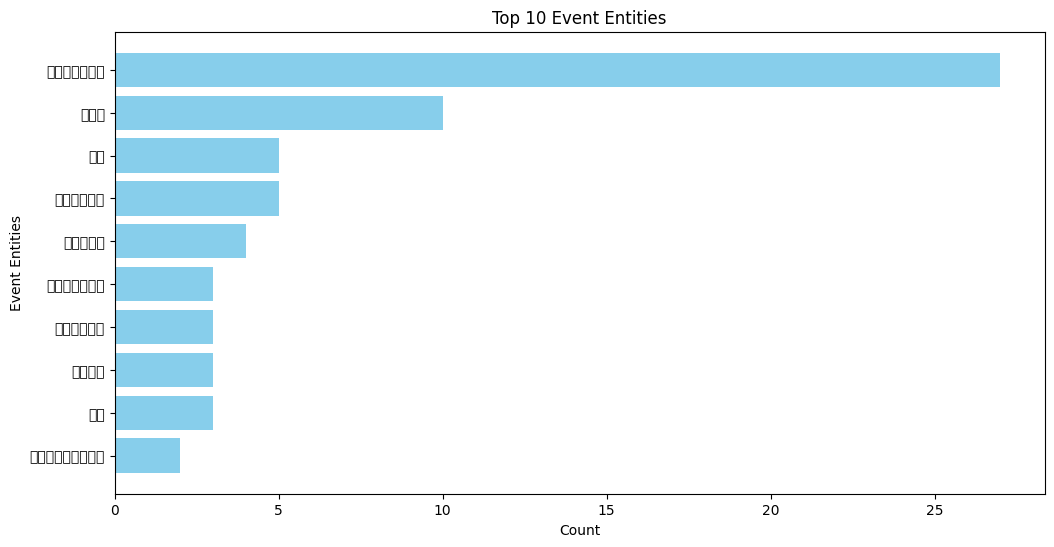

In [26]:
# 視覺化合併後的事件實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(event_data['word'].value_counts().index[:10], event_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Event Entities')
plt.title('Top 10 Event Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名事件實體（合併後）

我們可以看到俄烏戰爭（Ukraine-Russia War）在事件實體中佔據了第二名，這表明這一事件在 AI 討論中具有重要性。其他事件如台北國際電腦展（COMPUTEX TAIPEI）、新冠肺炎（COVID-19）和世界經濟論壇（WEF）也受到關注，反映出 AI 技術和全球事件之間的密切聯繫。

此外有新的事件實體「美國消費性電子展」（CES）進入前十名，這表明消費性電子產品和 AI 技術的結合受到關注，展示了 AI 在消費市場中的應用和影響，也說明有不少人有討論到國際性的事件。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 5: POS Analysis 詞性分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">POS Categories 詞性類別</div>

In [27]:
pos_count = pd.DataFrame(exploded_data['pos'].value_counts())
pos_count.reset_index(inplace=True)
pos_count.columns = ['pos', 'count']
pos_count

,pos,count
0,Na,200041
1,VC,63315
2,D,53448
3,VH,38351
4,Nc,38068
5,P,28841
6,DE,28218
7,VJ,20025
8,Nf,18679
9,VE,17876


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Plot the POS Categories 繪製詞性類別</div>

findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not

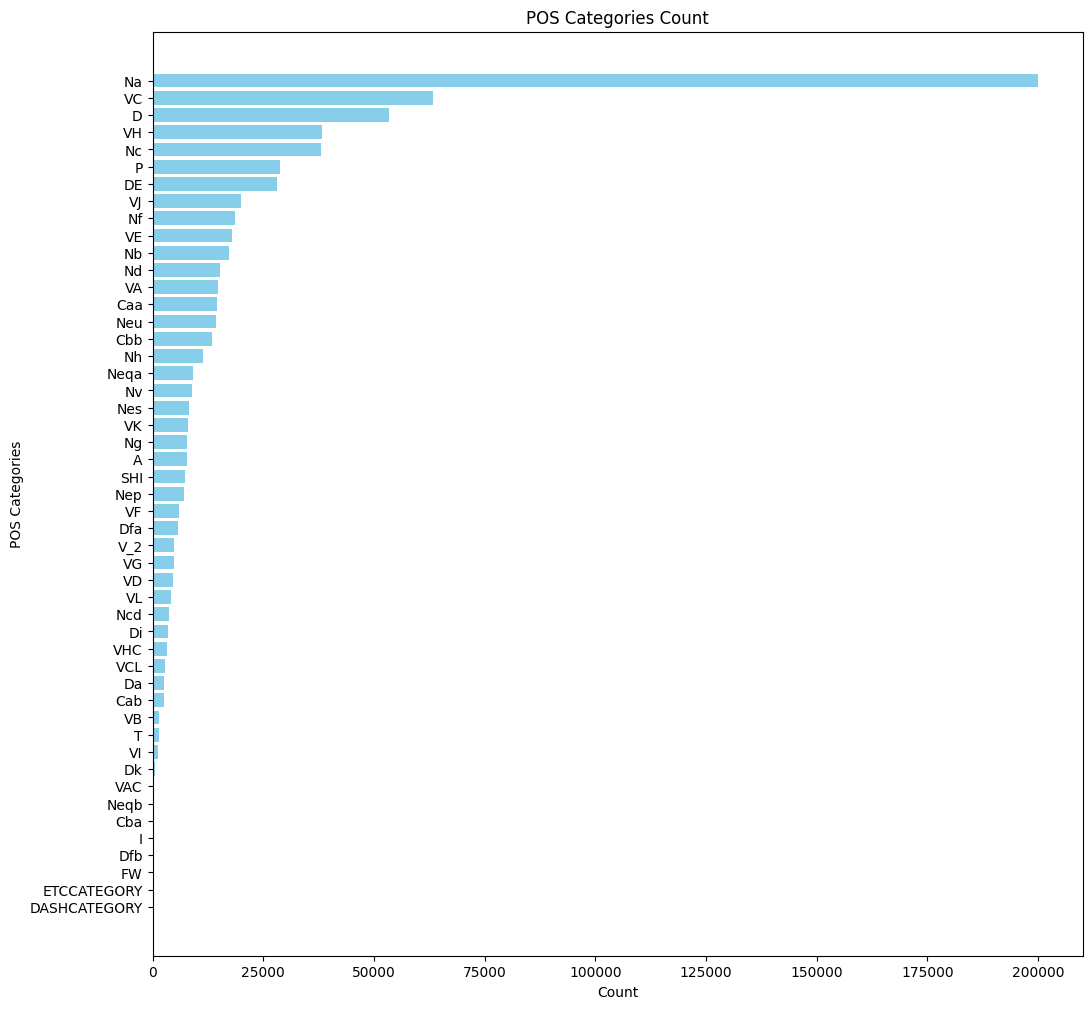

In [28]:
# 繪製詞性類別
plt.figure(figsize=(12, 12))
plt.barh(pos_count['pos'], pos_count['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('POS Categories')
plt.title('POS Categories Count')
plt.gca().invert_yaxis()
plt.show()

### POS (Part-of-Speech) 前十名分析

以下是對於POS標記前十名及其對應詞彙數量的詳細分析：

1. Na（普通名詞）：
    - 數量：260,884
    - 分析：普通名詞的高頻出現反映了討論中涉及大量具體事物、概念和主題。這些名詞包括具體的物體、場所、組織等。
    - 影響：名詞的頻繁使用有助於確定討論的核心話題和焦點，有助於理解文本的主要內容和關注點。

2. VC（及物動詞）：
    - 數量：86,245
    - 分析：及物動詞用於描述具體的動作和行為，通常後接受詞。高頻的VC表明討論中存在大量的具體行動描述。
    - 影響：分析及物動詞可以了解討論中的主要活動、操作及其對象，有助於理解討論的動態過程。

3. D（副詞）：
    - 數量：77,603
    - 分析：副詞用於修飾動詞、形容詞或其他副詞，提供更多細節和語氣。高頻副詞表明討論中對行動和性質的詳細描述。
    - 影響：副詞的使用可以揭示出討論的細節程度和語氣，幫助更準確地理解文本的語義。

4. VH（形容詞）：
    - 數量：57,294
    - 分析：形容詞用於修飾名詞，提供有關事物的性質、狀態或特徵的描述。高頻形容詞表明討論中對事物特徵的重視。
    - 影響：形容詞的使用可以揭示出討論中對不同事物的評價和看法，有助於理解文本的態度和觀點。

5. DE（結構助詞）：
    - 數量：47,542
    - 分析：結構助詞「的」用於連接名詞和修飾語，是漢語中最常見的結構詞之一。高頻出現表明句子結構中的常見用法。
    - 影響：結構助詞的使用有助於理解句子的結構和組成部分，有助於解析句子的語法關係。

6. Nc（專有名詞）：
    - 數量：46,297
    - 分析：專有名詞指特定的事物或名稱，如地名、人名、品牌名等。高頻專有名詞反映了具體實體在討論中的重要性。
    - 影響：專有名詞的分析有助於識別討論中的主要實體和關鍵詞，理解討論的具體對象。

7. P（介詞）：
    - 數量：45,155
    - 分析：介詞用於表示名詞、代詞與句中其他詞的關係。高頻介詞表明討論中對事物之間關係的描述。
    - 影響：介詞的使用有助於理解句子中的邏輯和語義關係，解析句子的結構。

8. Nb（其他名詞）：
    - 數量：31,501
    - 分析：這類名詞包括量詞、單位等。高頻其他名詞表明討論中對計量、單位等方面的描述。
    - 影響：其他名詞的分析有助於理解文本中的計量單位和具體數值，提供詳細的語境信息。

9. VE（有詞）：
    - 數量：27,162
    - 分析：有詞如「有」表示存在、擁有等。高頻有詞表明討論中對存在狀態和擁有關係的描述。
    - 影響：有詞的使用有助於理解討論中的擁有關係和存在狀態，解析文本的語義結構。

10. Nf（時間名詞）：
    - 數量：26,411
    - 分析：時間名詞如「今天」、「明天」等，表示時間。高頻時間名詞表明討論中對時間的重視。
    - 影響：時間名詞的分析有助於理解討論的時間背景和事件發生的時間點，提供時間軸信息。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Noun Categories 名詞類別</div>

findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.

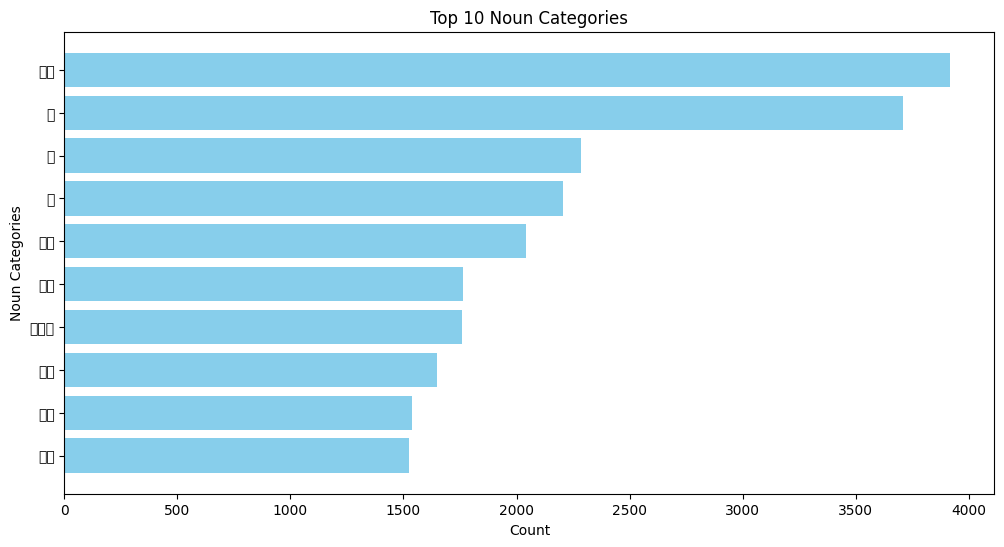

In [29]:
filter_pos = ['Na']
noun_data = exploded_data[exploded_data['pos'].isin(filter_pos)]

# 視覺化名詞類別
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(noun_data['word'].value_counts().index[:10], noun_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Noun Categories')
plt.title('Top 10 Noun Categories')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名名詞類別

我們可以看到「晶片」是名詞類別中出現頻率最高的詞彙，這表明在 AI 討論中晶片技術佔據了重要地位。其他常見名詞如「技術」、「科技」、「半導體」等也反映了 AI 領域的核心內容和關注點。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Verb Categories 動詞類別</div>

findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21034 (\N{CJK UNIFIED IDEOGRAPH-522A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38500 (\N{CJK UNIFIED IDEOGRAPH-9664}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Noto Sans TC' not found.
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vince-ylf/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Fo

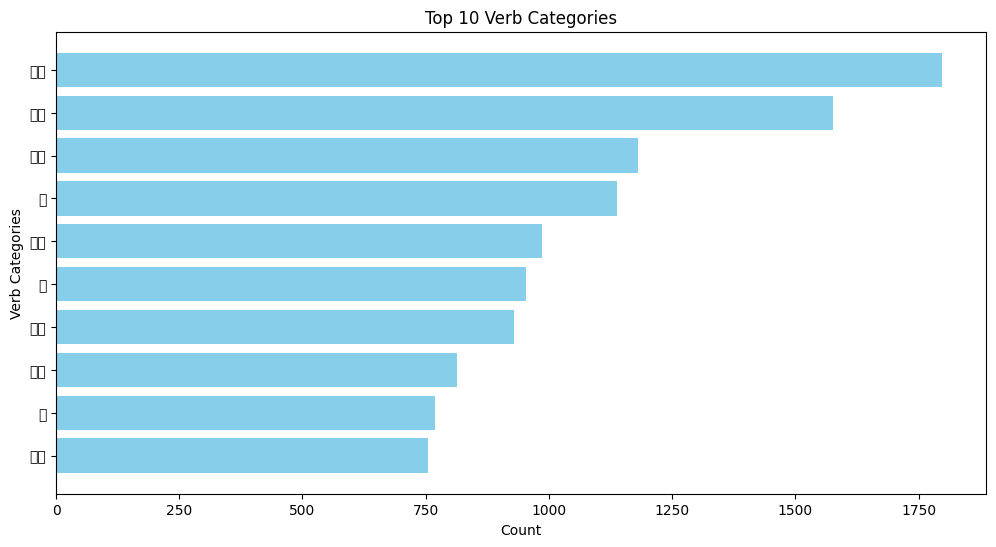

In [30]:
filter_pos = ['VC']
verb_data = exploded_data[exploded_data['pos'].isin(filter_pos)]

# 視覺化動詞類別
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(verb_data['word'].value_counts().index[:10], verb_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Verb Categories')
plt.title('Top 10 Verb Categories')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名動詞類別

在動詞類別中，「投資」是出現頻率最高的詞彙，這表明在 AI 討論中投資行為佔據了重要地位。其他常見動詞如「發展」、「開發」、「使用」則反應大眾對 AI 技術發展和應用的關注。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 6: Conclusion 結論</div>

## 結論

通過對 AI 相關文本數據的 NER 和 POS 分析，我們可以獲得以下結論：

1. 組織實體：NVIDIA、Google、蘋果等組織在 AI 領域佔據重要地位，其技術和產品受到廣泛關注。
2. 人物實體：黃仁勳、馬斯克、薩提亞·納德拉等人物在 AI 領域具有重要影響力，其技術貢獻和觀點受到關注。
3. 事件實體：台北國際電腦展、俄烏戰爭、新冠肺炎等事件在 AI 討論中引起關注，反映出 AI 技術和全球事件之間的聯繫。
4. 詞性分析：普通名詞、及物動詞、副詞等詞性在討論中出現頻率較高，反映出討論的主題、行動和描述特徵。
5. 名詞類別：晶片、技術、科技等名詞在 AI 討論中出現頻率較高，反映出 AI 領域的核心內容和關注點。
6. 動詞類別：投資、發展、開發等動詞在 AI 討論中出現頻率較高，反映出對 AI 技術發展和應用的關注。